<a href="https://colab.research.google.com/github/atriap/Fraud_Prediction/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

In [ ]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv('C:/Users/ASUS/Desktop/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
>>> import math
>>> import statistics
>>> import numpy as np
>>> import scipy.stats
>>> import pandas as pd

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Total number of unique customers
print(f"Total number of unique customers are {df.nameOrig.nunique()}")
print(f"Total number of unique customers are {df.nameDest.nunique()}")
print(f"Average no. of transactions per customer are {df.shape[0]/df.nameOrig.nunique()}")
print(f"Average no. of transactions per recipient are {df.shape[0]/df.nameDest.nunique()}")

Total number of unique customers are 6353307
Total number of unique customers are 2722362
Average no. of transactions per customer are 1.0014658507766112
Average no. of transactions per recipient are 2.337168973119666


In [ ]:
# Data Skewness
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

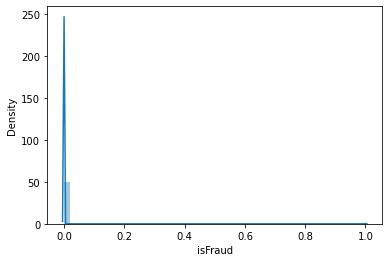

In [ ]:
sns.distplot(df['isFraud'].dropna() )

0    6354407
1       8213
Name: isFraud, dtype: int64


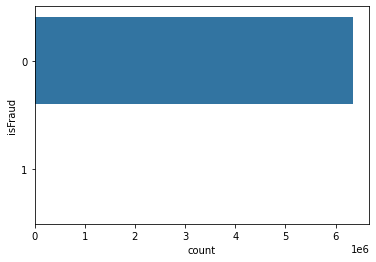

In [ ]:
print(df.isFraud.value_counts())
sns.countplot(y="isFraud",data=df)
plt.show()

# Data Plotting

<AxesSubplot:ylabel='isFraud'>

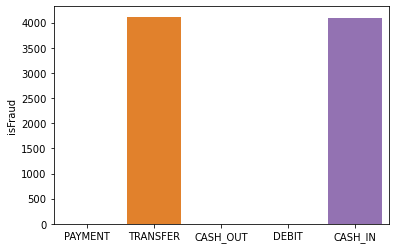

In [ ]:
sns.barplot(x=df.type.unique(),y=df.groupby("type")["isFraud"].sum())

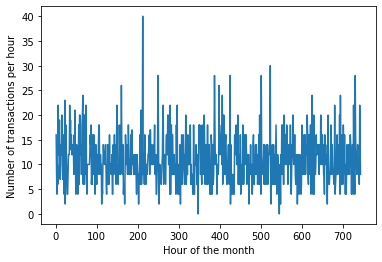

In [ ]:
sns.lineplot(x=list(range(1,744)),y=df.groupby("step")["isFraud"].sum())
plt.xlabel("Hour of the month")
plt.ylabel("Number of transactions per hour")
plt.show()

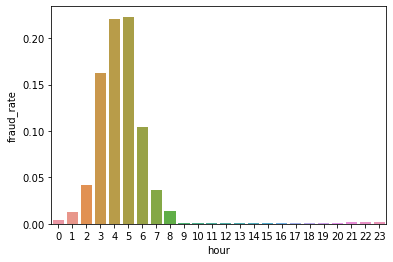

In [ ]:
df["hour"] = df.step % 24
frauds_hour = pd.concat([df.groupby("hour")["isFraud"].sum(),df.groupby("hour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

Hasil menunjukkan bahwa distribusi data jam transaksi dan tingkat fraud juga tidak seimbang, dimana ada outlier yang memengaruhi hasil rata-rata

<ipython-input-15-2fda1b657126>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


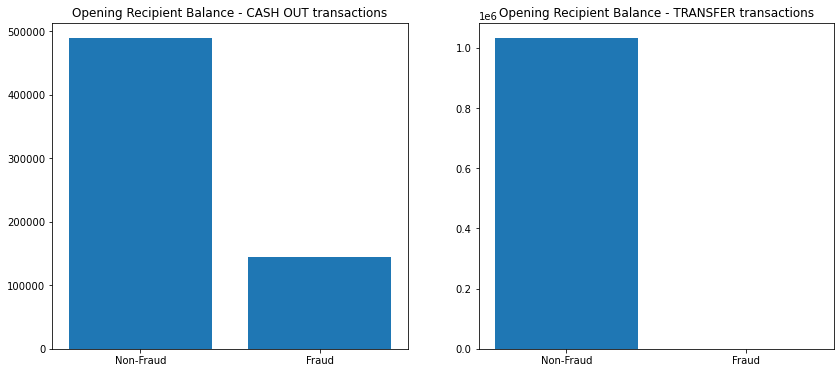

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].title.set_text("Opening Recipient Balance - CASH OUT transactions")
ax[0].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="CASH_OUT"].groupby("isFraud")["oldbalanceDest"].median())
ax[1].title.set_text("Opening Recipient Balance - TRANSFER transactions")
ax[1].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="TRANSFER"].groupby("isFraud")["oldbalanceDest"].median())
fig.show()

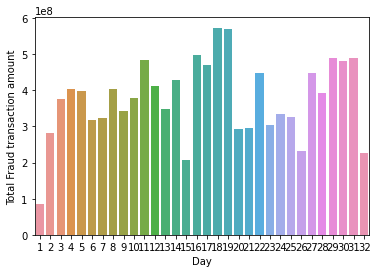

In [ ]:
df["day"] = round(df.step/24)
sns.barplot(x=list(range(1,33)),y=df[df.isFraud==1].groupby("day")["amount"].sum())
plt.xlabel("Day")
plt.ylabel("Total Fraud transaction amount")
plt.show()

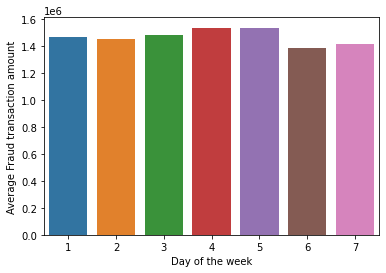

In [ ]:
df["dayweek"] = df.day % 7
sns.barplot(x=list(range(1,8)),y=df[df.isFraud==1].groupby("dayweek")["amount"].mean())
plt.xlabel("Day of the week")
plt.ylabel("Average Fraud transaction amount")
plt.show()

## Data Cleaning

In [ ]:
df1 = df.copy()

In [ ]:
df1["hourday"] = df1.step % 24
df1["hourweek"] = df1.step % (24*7)
df1["day"] = round(df1.step/24)
df1["dayweek"] = df1.day % 7
df1["daymonth"] = df1.day % 30

In [ ]:
df1 = pd.get_dummies(df1,columns=["type"])
df1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,dayweek,hourday,hourweek,daymonth,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0.0,0.0,1,1,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0.0,0.0,1,1,0.0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0.0,0.0,1,1,0.0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0.0,0.0,1,1,0.0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0.0,0.0,1,1,0.0,0,0,0,1,0


In [ ]:
df1["logamount"] = np.log1p(df1["amount"])
df1["logoldbalanceOrg"] = np.log1p(df1["oldbalanceOrg"])
df1["lognewbalanceOrig"] = np.log1p(df1["newbalanceOrig"])
df1["logoldbalanceDest"] = np.log1p(df1["oldbalanceDest"])
df1["lognewbalanceDest"] = np.log1p(df1["newbalanceDest"])
df1["custdiff"] = df1["oldbalanceOrg"] - df1["newbalanceOrig"]
df1["destdiff"] = df1["oldbalanceDest"] - df1["newbalanceDest"]
df1["custind"] = np.where(df1["oldbalanceOrg"] - df1["newbalanceOrig"] == df1.amount,1,0)
df1["destind"] = np.where(df1["oldbalanceDest"] - df1["newbalanceDest"] == df1.amount,1,0)
df1["custrto"] = df1.oldbalanceOrg/(df1.newbalanceOrig+1)
df1["destrto"] = df1.oldbalanceDest/(df1.newbalanceDest+1)
df1["custdestrto1"] = df1.oldbalanceOrg/(df1.oldbalanceDest+1)
df1["custdestrto2"] = df1.newbalanceOrig/(df1.newbalanceDest+1)
df1["custamountrto"] = df1.oldbalanceOrg/(df1.amount+1)
df1["destamountrto"] = df1.oldbalanceDest/(df1.amount+1)

In [ ]:
df1 = df1.drop(["isFlaggedFraud","nameOrig","nameDest"],axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split

X1,X2,y1,y2 = train_test_split(df1.drop("isFraud",axis=1),df1["isFraud"],test_size=0.3,random_state=1234,stratify = df1["isFraud"])
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=1234,stratify = y1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3117683, 32)
(1336151, 32)
(3117683,)
(1336151,)


# Model Fitting

In [ ]:
from imblearn.pipeline import Pipeline as pl2
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = pl2([
    ('stdize',StandardScaler()),
    ('sampler',RandomUnderSampler(random_state=1234,sampling_strategy='majority')),
    ('clf',LogisticRegression(max_iter=1000000))
    ])
logreg.fit(X_train,y_train)

Pipeline(steps=[('stdize', StandardScaler()),
                ('sampler',
                 RandomUnderSampler(random_state=1234,
                                    sampling_strategy='majority')),
                ('clf', LogisticRegression(max_iter=1000000))])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

log_reg= LogisticRegression()

**confusion matrix test for accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
logreg.fit(X_train,y_train)
y_pred_test = logreg.predict(X_test)

In [ ]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9993615991007004

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


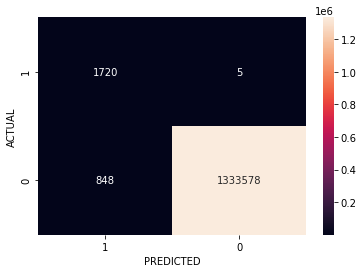

In [ ]:
draw_cm( y_test, y_pred_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
print(cm)

[[1333578     848]
 [      5    1720]]


In [ ]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.9993615991007004


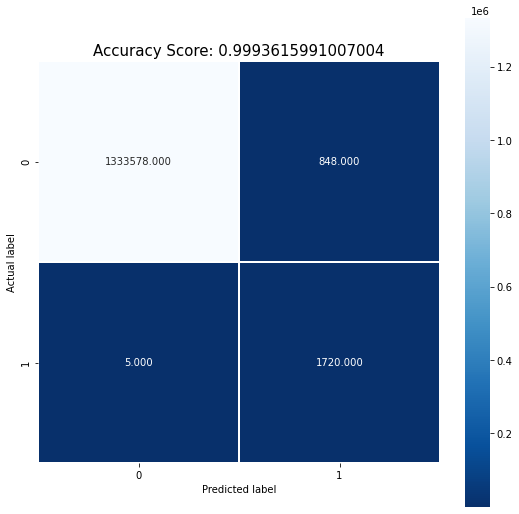

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

 # Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


RF = pl2([
    ('sampler',RandomUnderSampler(random_state=1234,sampling_strategy='majority')),
    ('clf',RandomForestClassifier(max_features='sqrt', max_depth=2, random_state=0)
 
    )])
RF.fit(X_train,y_train)

Pipeline(steps=[('sampler',
                 RandomUnderSampler(random_state=1234,
                                    sampling_strategy='majority')),
                ('clf',
                 RandomForestClassifier(max_depth=2, max_features='sqrt',
                                        random_state=0))])

In [ ]:
parameters = {'clf__n_estimators':[300,500],
              'clf__max_depth':[2]}

**confusion matrix test for accuracy**

In [ ]:
RF.fit(X_train,y_train)
RF_y_pred_test = RF.predict(X_test)

In [ ]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RF_y_pred_test)

0.9970542251586834

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


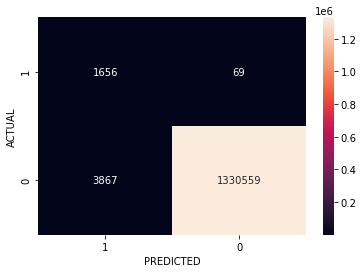

In [ ]:
draw_cm( y_test, RF_y_pred_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, RF_y_pred_test)
print(cm)

[[1330559    3867]
 [     69    1656]]


In [ ]:
# Use score method to get accuracy of model
RFscore = RF.score(X_test, y_test)
print(score)

0.9993615991007004


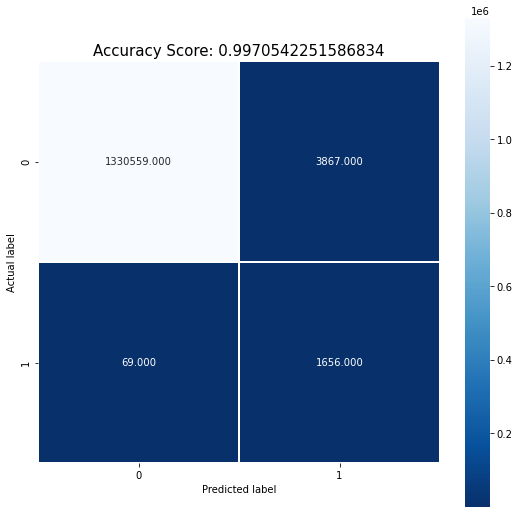

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(RFscore)
plt.title(all_sample_title, size = 15);

# Fitting Best Model

-

# - AUC 

In [ ]:
cv = GridSearchCV(RF,parameters,scoring="roc_auc",verbose=True,n_jobs=6)
cv.fit(X_test,y_test)
print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'clf__max_depth': 2, 'clf__n_estimators': 500}
0.998502435550759


<AxesSubplot:xlabel='Importance', ylabel='Variable'>

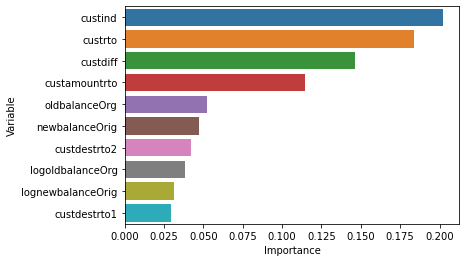

In [ ]:
imp = pd.DataFrame({"Variable":list(X_train.columns),"Importance":cv.best_estimator_['clf'].feature_importances_})
imp = imp.sort_values("Importance",ascending=False)
sns.barplot(x=imp.Importance.head(10),y=imp.Variable.head(10))

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

**using Test Data**

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

print(f"AUC of logistic regression classifier is {roc_auc_score(logreg.predict(X_test),y_test)}")
print(f"AUC of Random Forest classifier is {roc_auc_score(RF.predict(X_test),y_test)}")

AUC of logistic regression classifier is 0.8348890910831152
AUC of Random Forest classifier is 0.6498925949349819


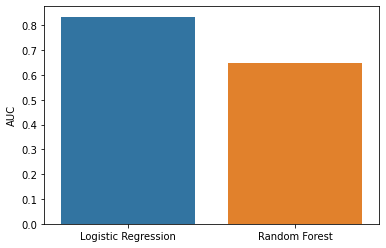

In [ ]:
sns.barplot(x=["Logistic Regression","Random Forest"],
            y=[roc_auc_score(logreg.predict(X_test),y_test),
               roc_auc_score(RF.predict(X_test),y_test)])
plt.ylabel("AUC")
plt.show()

# ROC Curve

In [ ]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

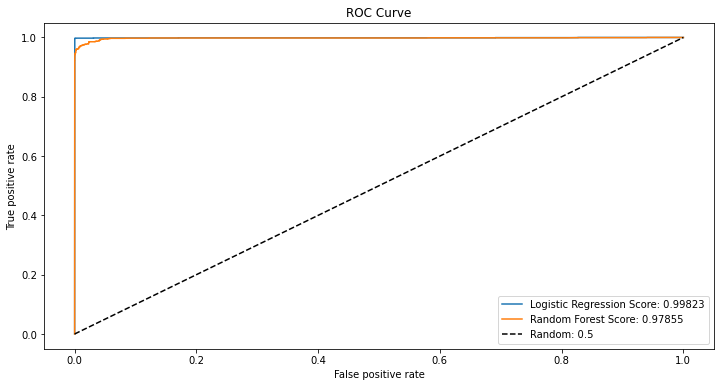

In [ ]:
auc_logreg, fpr_logreg, tpr_logreg = get_auc_scores(y_test, y_pred_test, logreg.predict_proba(X_test)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_test, RF_y_pred_test, RF.predict_proba(X_test)[:,1])

plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Score: ' + str(round(auc_logreg, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'Random Forest Score: ' + str(round(auc_RF, 5)))

plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()